<a href="https://colab.research.google.com/github/Yugsolanki/ML-SC-Lab/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install deap

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [6]:
# Fitness function (to be minimized)
def fitness_function(individual):
    return sum(x**2 for x in individual),

In [7]:
# Genetic Algorithm implementation
def implement_ga():
    # Create types
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    # Initialize toolbox
    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, -5, 5)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Genetic operators
    toolbox.register("evaluate", fitness_function)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Create population and run evolution
    population = toolbox.population(n=50)
    ngen = 100
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    pop, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=ngen, stats=stats, verbose=True)

    return pop, logbook

In [8]:
# Run the GA
best_pop, logbook = implement_ga()

gen	nevals	avg    	min     
0  	50    	14.4656	0.600889
1  	40    	10.1735	0.0736011
2  	40    	3.94682	0.0531493
3  	33    	1.83574	0.0531493
4  	35    	0.607425	0.0163226
5  	40    	0.216526	0.00126068
6  	38    	0.318223	0.00126068
7  	38    	0.062513	0.000144266
8  	37    	0.0640863	0.000144266
9  	32    	0.222973 	0.000397542
10 	38    	0.216645 	0.000249958
11 	40    	0.161515 	0.000172381
12 	38    	0.232002 	0.00013965 
13 	46    	0.184079 	0.000100555
14 	39    	0.059179 	3.35284e-05
15 	37    	0.0593873	9.01248e-06
16 	40    	0.0874483	2.75143e-05
17 	43    	0.311821 	1.02854e-05
18 	40    	0.0416615	2.54158e-06
19 	39    	0.121832 	2.54158e-06
20 	42    	0.181073 	2.53789e-07
21 	35    	0.0445011	4.85484e-08
22 	41    	0.0944857	4.85484e-08
23 	37    	0.0788946	9.28209e-09
24 	33    	0.109134 	1.16275e-09
25 	38    	0.00362633	1.16275e-09
26 	44    	0.0516117 	1.55048e-09
27 	39    	0.049064  	8.11882e-11
28 	34    	0.0398093 	1.45113e-10
29 	33    	0.16379   	4.11379e-11
30

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


# Data Analysis

- Extract relevant information from the logbook
- Calculate statistics and trends

In [9]:
gen = logbook.select("gen")
avg_fitness = logbook.select("avg")
min_fitness = logbook.select("min")

In [10]:
# Correlation analysis
correlation = np.corrcoef(avg_fitness, min_fitness)[0, 1]

# Visualization:
1. Fitness evolution plot
2. Final population distribution
3. Convergence rate analysis

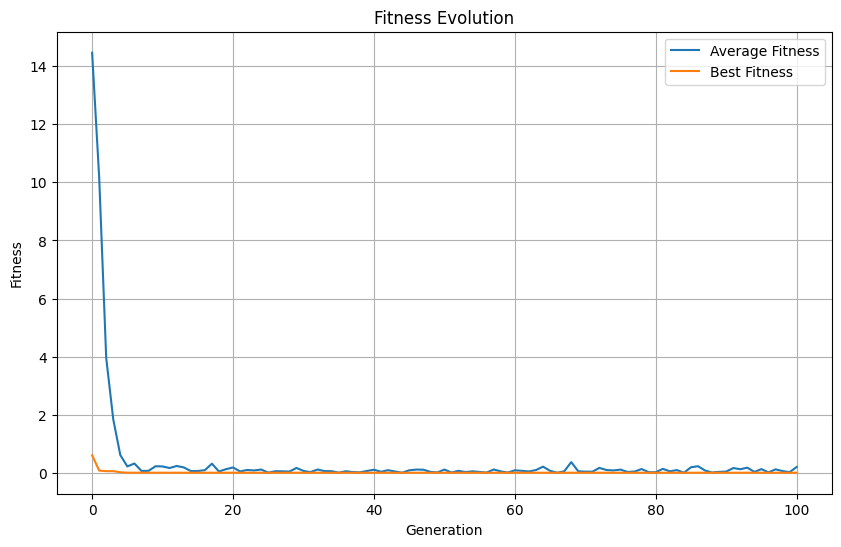

In [11]:
# 1. Fitness evolution plot
plt.figure(figsize=(10, 6))
plt.plot(gen, avg_fitness, label="Average Fitness")
plt.plot(gen, min_fitness, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.title("Fitness Evolution")
plt.grid(True)
plt.show()

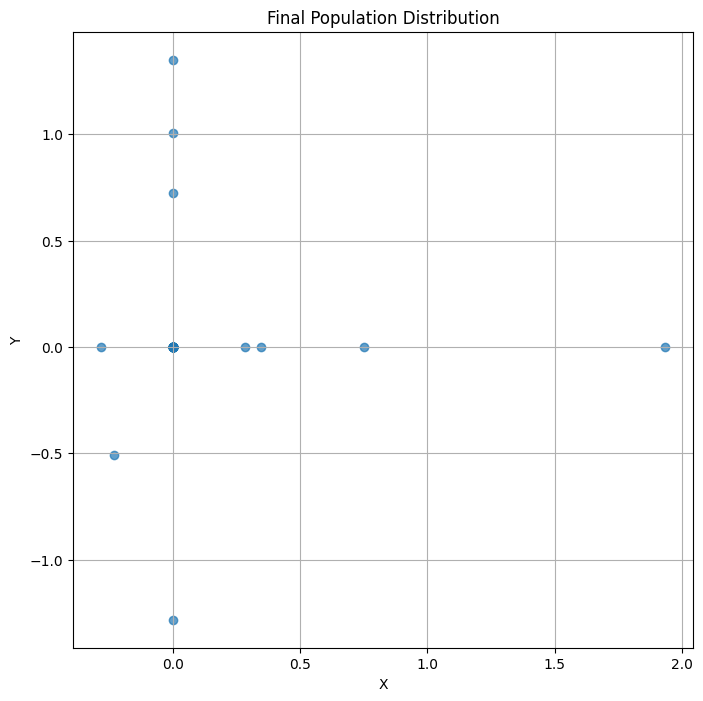

In [12]:
# 2. Final population distribution
final_pop = np.array([ind for ind in best_pop])
plt.figure(figsize=(8, 8))
plt.scatter(final_pop[:, 0], final_pop[:, 1], alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Final Population Distribution")
plt.grid(True)
plt.show()

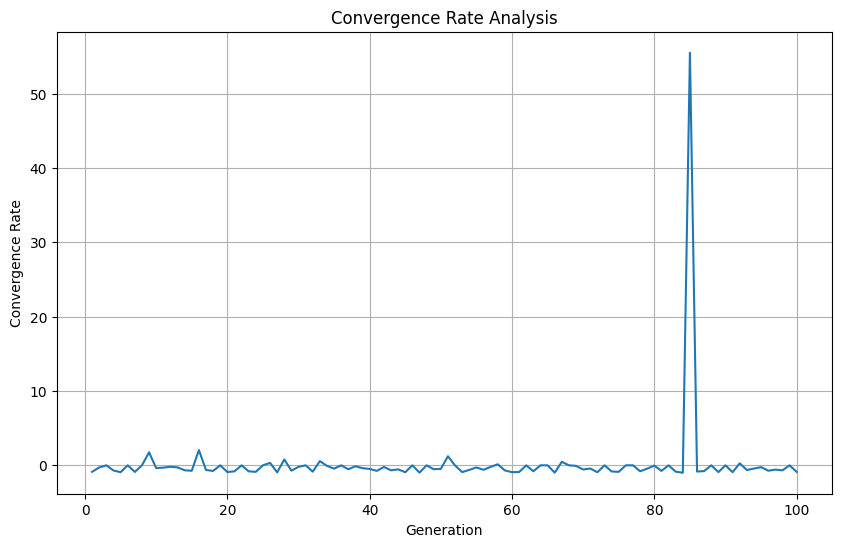

In [13]:
# 3. Convergence rate analysis
convergence_rate = np.diff(min_fitness) / np.array(min_fitness[:-1])
plt.figure(figsize=(10, 6))
plt.plot(gen[1:], convergence_rate)
plt.xlabel("Generation")
plt.ylabel("Convergence Rate")
plt.title("Convergence Rate Analysis")
plt.grid(True)
plt.show()

In [14]:
# Print correlation and best solution
print(f"Correlation between average and minimum fitness: {correlation:.4f}")
print(f"Best solution: {tools.selBest(best_pop, k=1)[0]}")
print(f"Best fitness: {tools.selBest(best_pop, k=1)[0].fitness.values[0]:.6f}")

Correlation between average and minimum fitness: 0.8756
Best solution: [1.102234369963963e-21, 3.386123406522945e-19]
Best fitness: 0.000000
